<a href="https://colab.research.google.com/github/AdrienVansuyt/Python-Quant-Exercices/blob/main/Forecasting_Bitcoin_RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Forecasting Bitcoin Using (RNNs)**

All credits goes to abdallah abdelkarim for this exercice

In [8]:
import yfinance
import matplotlib
import numpy
import tensorflow

In [10]:
import yfinance as yf
# Download Bitcoin price data
btc = yf.download('BTC-USD', start='2018-01-01', end='2024-07-25')
# Display the first few rows of the data
print(btc.head())

[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000   

               Adj Close       Volume  
Date                                   
2018-01-01  13657.200195  10291200000  
2018-01-02  14982.099609  16846600192  
2018-01-03  15201.000000  16871900160  
2018-01-04  15599.200195  21783199744  
2018-01-05  17429.500000  23840899072  


In [11]:
import numpy as np
# Remove missing values
btc = btc.dropna()
# Convert the 'Close' price to a numpy array
close_prices = btc['Close'].values
# Print the shape of the data
print(close_prices.shape)

(2397,)


In [12]:
from sklearn.preprocessing import MinMaxScaler # Create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(0, 1)) # Normalize the data
scaled_prices = scaler.fit_transform(close_prices.reshape(-1, 1)) # Print the first few normalized values
print(scaled_prices[:5])

[[0.14919005]
 [0.16815872]
 [0.17129273]
 [0.17699378]
 [0.2031983 ]]


In [14]:
 # Determine the number of training and testing samples
train_size = int(len(scaled_prices) * 0.8)
test_size = len(scaled_prices) - train_size
# Split the data into training and testing sets
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]
# Print the sizes of the training and testing sets
print(train_data.shape, test_data.shape)

(1917, 1) (480, 1)


In [17]:
def create_sequences(data, seq_length):
  X = []
  y = []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)
seq_length = 10
# Create the training sequences
X_train, y_train = create_sequences(train_data, seq_length) # Create the testing sequences
X_test, y_test = create_sequences(test_data, seq_length)
# Print the shapes of the training and testing sequences
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1907, 10, 1) (1907, 1)
(470, 10, 1) (470, 1)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Define the model architecture
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, 1)))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Print the model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [21]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
60/60 [==============================] - 3s 16ms/step - loss: 0.0059 - val_loss: 0.0010
Epoch 2/50
60/60 [==============================] - 0s 7ms/step - loss: 7.2803e-04 - val_loss: 9.5414e-04
Epoch 3/50
60/60 [==============================] - 0s 7ms/step - loss: 6.7182e-04 - val_loss: 8.7014e-04
Epoch 4/50
60/60 [==============================] - 0s 7ms/step - loss: 6.4938e-04 - val_loss: 8.5192e-04
Epoch 5/50
60/60 [==============================] - 1s 11ms/step - loss: 6.5050e-04 - val_loss: 8.9188e-04
Epoch 6/50
60/60 [==============================] - 1s 11ms/step - loss: 5.9508e-04 - val_loss: 0.0013
Epoch 7/50
60/60 [==============================] - 1s 11ms/step - loss: 5.9862e-04 - val_loss: 0.0010
Epoch 8/50
60/60 [==============================] - 1s 11ms/step - loss: 5.7139e-04 - val_loss: 7.7283e-04
Epoch 9/50
60/60 [==============================] - 1s 12ms/step - loss: 5.1510e-04 - val_loss: 7.5108e-04
Epoch 10/50
60/60 [==============================] - 1s 

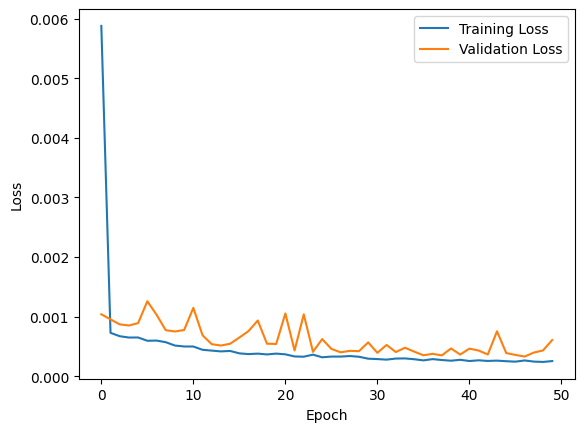

In [23]:
import matplotlib.pyplot as plt
# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

15/15 [==============================] - 1s 4ms/step


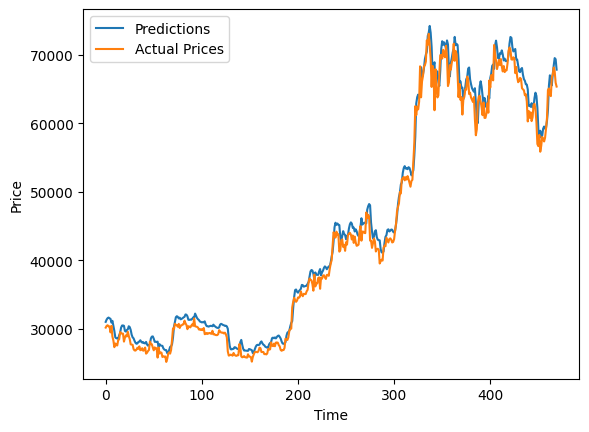

In [26]:
# Generate predictions on the testing data
predictions = model.predict(X_test)
# Inverse transform the predictions and actual prices
predictions = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
# Plot the predictions and actual prices
plt.plot(predictions, label='Predictions')
plt.plot(actual_prices, label='Actual Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()